# Model Analysis and GridSearch

In this final notebook we analyze our model's performance using various metrics like ROC curves and use `GridSearch` to find the best hyperparameters for our model. We train our final model on the dataset using these hyperparameters.

### Importing libraries

In [1]:
import joblib
import pyarrow

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 
from sklearn.metrics import precision_score, recall_score, classification_report, roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# to display all columns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Importing the prepared datasets
Similar to our steps in the previous notebook, e read in the training, validation and test sets and verify the data by validating our saved logistic model's performance.

In [5]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')
val_targets = pd.read_parquet('val_targets.parquet')
test_targets = pd.read_parquet('test_targets.parquet')

Wall time: 29.5 ms


In [6]:
Tampa_restaurants1 = joblib.load('Tampa_restaurants.joblib')

In [7]:
# sanity check
test_preds2 = Tampa_restaurants1['model'].predict(test_inputs)
accuracy_score(test_targets, test_preds2)

0.8093587521663779

# Decision Tree

We train and analyze our decision tree model.

In [8]:
# intantiate the model
dt = DecisionTreeClassifier(max_depth=5)

# train the model
dt.fit(train_inputs, train_targets)

# check the score
print(f'Decision Tree Train Score: {dt.score(train_inputs, train_targets)}')
print(f'Decision Tree Test Score: {dt.score(test_inputs, test_targets)}')

Decision Tree Train Score: 0.806836679327184
Decision Tree Test Score: 0.7608318890814558


The model has accuracy of 80.6% on train data and 76% on test data. Next, we will evaluate this model using confusion matrix, classification scores and ROC curve.

Next, we will take a look at precision and recall score where:

Precision measures what proportion of a model assigned to positive/negative class are actually members of the positive/negative class:

$$Precision = \frac{TP}{TP+FP}$$

On the other hand, recall score measures the proportion of the positive class the model correctly identified out of the total actual positives:

$$Recall = \frac{TP}{TP+FN}$$

In [9]:
# Get class predictions
y_pred = dt.predict(test_inputs)

# check precision and recall score for the model
report_initial = classification_report(test_targets, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.68      0.56      0.62       197
           1       0.79      0.86      0.83       380

    accuracy                           0.76       577
   macro avg       0.74      0.71      0.72       577
weighted avg       0.75      0.76      0.75       577




A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR).

- the true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)).

- the false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)).

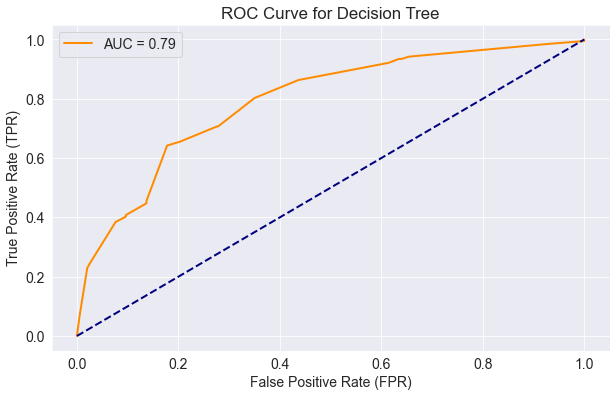

Area under curve (AUC) test data:0.791971680470211


In [10]:
# Make probabilistic predictions (scores)
y_proba_test = dt.predict_proba(test_inputs)[:,1]

# getting false positive rate and true positive rate
fprs_test, tprs_test, thresholds_test = roc_curve(test_targets, y_proba_test)

# area under curve score
roc_auc_test = roc_auc_score(test_targets, y_proba_test)

plt.figure()
plt.plot(fprs_test, tprs_test, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC) test data:{roc_auc_test}')

# Random Forest

We train and analyze our Random Forest model.

In [11]:
# intantiate the model
rf = RandomForestClassifier(max_depth=5)

# train the model
rf.fit(train_inputs, train_targets)

# check the score
print(f'Random Forest Train Score: {rf.score(train_inputs, train_targets)}')
print(f'Random Forest Test Score: {rf.score(test_inputs, test_targets)}')

Random Forest Train Score: 0.8252848616386327
Random Forest Test Score: 0.7850953206239168


In [12]:
# Get class predictions
y_pred = rf.predict(test_inputs)

# check precision and recall score for the model
report_initial = classification_report(test_targets, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.83      0.47      0.60       197
           1       0.77      0.95      0.85       380

    accuracy                           0.79       577
   macro avg       0.80      0.71      0.73       577
weighted avg       0.79      0.79      0.77       577



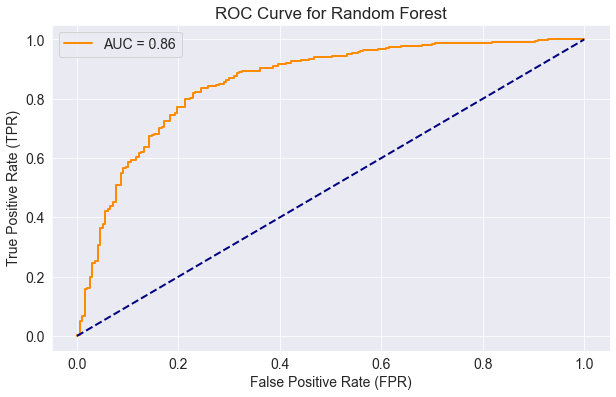

Area under curve (AUC) test data:0.8559310713331553


In [13]:
# Make probabilistic predictions (scores)
y_proba_test = rf.predict_proba(test_inputs)[:,1]

# getting false positive rate and true positive rate
fprs_test, tprs_test, thresholds_test = roc_curve(test_targets, y_proba_test)

# area under curve score
roc_auc_test = roc_auc_score(test_targets, y_proba_test)

plt.figure()
plt.plot(fprs_test, tprs_test, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC) test data:{roc_auc_test}')

# Gradient Boosting

Lastly, we look at gradient boosting model.

In [14]:
# intantiate the model
gb = GradientBoostingClassifier()

# train the model
gb.fit(train_inputs, train_targets)

# check the score
print(f'Gradient Boosting Train Score: {gb.score(train_inputs, train_targets)}')
print(f'Gradient Boosting Test Score: {gb.score(test_inputs, test_targets)}')

Gradient Boosting Train Score: 0.8969072164948454
Gradient Boosting Test Score: 0.8388214904679376


In [15]:
# Get class predictions
y_pred = gb.predict(test_inputs)

# check precision and recall score for the model
report_initial = classification_report(test_targets, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       197
           1       0.84      0.93      0.88       380

    accuracy                           0.84       577
   macro avg       0.83      0.80      0.81       577
weighted avg       0.84      0.84      0.83       577



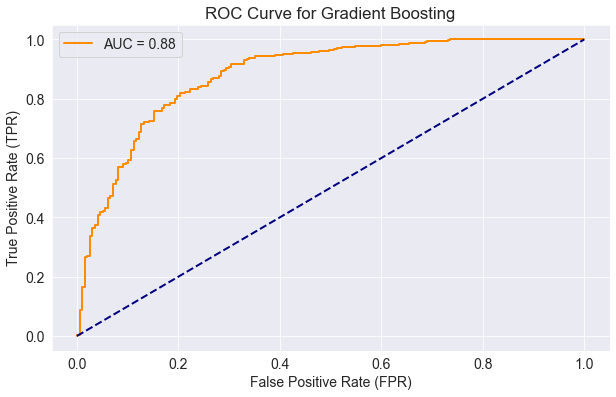

Area under curve (AUC) test data:0.8815121560245792


In [16]:
# Make probabilistic predictions (scores)
y_proba_test = gb.predict_proba(test_inputs)[:,1]

# getting false positive rate and true positive rate
fprs_test, tprs_test, thresholds_test = roc_curve(test_targets, y_proba_test)

# area under curve score
roc_auc_test = roc_auc_score(test_targets, y_proba_test)

plt.figure()
plt.plot(fprs_test, tprs_test, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC) test data:{roc_auc_test}')

Based on the different scores, Gradient Boosting and Logistic Regression gave the best performance. So, we will use GridSearch to determine best model using hyperparameter optimization and then build the model with best estimators and evaluate the model for it's performance.

In [17]:


estimators = [
    ('normalise', StandardScaler()),
    ('model', GradientBoostingClassifier())
]

pipe = Pipeline(estimators)


param_grid = [
            {
                'model': [LogisticRegression()], 
                'normalise': [StandardScaler(), MinMaxScaler(), None],
                'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                'model__solver': ['lbfgs', 'liblinear']
            }, 
            {
                'model': [GradientBoostingClassifier()],
                'normalise': [None], 
                'model__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                'model__max_depth': [3, 5, 7, 9, 12],
                'model__n_estimators': [100, 200, 300, 400, 500, 600],
                'model__max_features': ['sqrt', 'log2']
            }
] 

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=2) 

fittedgrid = grid.fit(train_inputs, train_targets)

Fitting 5 folds for each of 414 candidates, totalling 2070 fits
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=M

[CV] END model=LogisticRegression(), model__C=0.01, model__solver=lbfgs, normalise=None; total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.01, model__solver=lbfgs, normalise=None; total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.01, model__solver=liblinear, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.01, model__solver=liblinear, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.01, model__solver=liblinear, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.01, model__solver=liblinear, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.01, model__solver=liblinear, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.01, model__solver=liblinear, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model

[CV] END model=LogisticRegression(), model__C=1, model__solver=liblinear, normalise=None; total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__solver=lbfgs, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__solver=lbfgs, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__solver=lbfgs

[CV] END model=LogisticRegression(), model__C=1000, model__solver=liblinear, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=1000, model__solver=liblinear, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=1000, model__solver=liblinear, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=1000, model__solver=liblinear, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=1000, model__solver=liblinear, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=1000, model__solver=liblinear, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=1000, model__solver=liblinear, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=1000, model__solver=liblinear, normalise=None; total time=   0.0s
[CV] END model=LogisticRegress

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=3, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   0.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=3, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=3, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=3, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=3, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=3, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=5, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=7, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=7, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=7, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=7, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=7, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=7, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=9, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   3.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=9, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   3.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=9, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   3.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=9, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=9, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=9, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=12, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   3.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=12, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   3.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=12, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   4.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=12, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   4.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=12, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   4.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=12, model__max_f

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.05, model__max_depth=12, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   6.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=sq

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   0.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=3, model__max_features=log2

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=5, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=5, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=5, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=5, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=5, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=5, model__max_features=log2

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=7, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   1.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=7, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   1.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=7, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   1.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=7, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   1.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=7, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   1.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=7, model__max_features=sqrt

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   1.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   1.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   1.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   1.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   1.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=sqrt

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   2.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   2.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   2.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   2.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   2.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=9, model__max_features=log2

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=12, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   3.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=12, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   3.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=12, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   3.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=12, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   3.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=12, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   4.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.1, model__max_depth=12, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=3, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   0.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=3, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   0.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=3, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=3, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=3, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=3, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=5, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=5, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=5, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=5, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=5, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=5, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   1.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   1.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   1.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   1.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=7, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=9, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=9, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=9, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=9, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=9, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   1.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=9, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=12, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   4.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=12, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   5.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=12, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   4.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=12, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   5.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=12, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   5.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.15, model__max_depth=12, model__max_f

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=sqrt

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=3, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=5, model__max_features=sqrt

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=5, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=5, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=5, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=5, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   0.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=5, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   0.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=5, model__max_features=log2

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=7, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   1.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=7, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=7, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=7, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=7, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=7, model__max_features=log2

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=9, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   2.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=9, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   2.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=9, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   2.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=9, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   2.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=9, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   2.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=9, model__max_features=sqrt

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   1.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   1.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   2.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   2.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   2.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   4.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   4.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   4.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   4.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   4.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.2, model__max_depth=12, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=3, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=3, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=3, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=3, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=3, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=3, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=5, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=5, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=5, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=5, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=5, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=5, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=7, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   0.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=7, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   0.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=7, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   0.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=7, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   0.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=7, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   1.1s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=7, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=7, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   1.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=7, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   1.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_features=sqrt, model__n_estimators=100, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   1.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   1.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   1.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   1.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_features=log2, model__n_estimators=400, normalise=None; total time=   1.8s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=9, model__max_feature

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=12, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=12, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=12, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=12, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.9s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=12, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   2.0s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.25, model__max_depth=12, model__max_f

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=3, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   0.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=3, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   0.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=3, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   0.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=3, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=3, model__max_features=sqrt, model__n_estimators=500, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=3, model__max_features=sqrt

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=sqrt, model__n_estimators=200, normalise=None; total time=   0.2s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=sqrt

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=log2, model__n_estimators=500, normalise=None; total time=   0.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=log2, model__n_estimators=600, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=5, model__max_features=log2

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=7, model__max_features=log2, model__n_estimators=200, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=7, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=7, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=7, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=7, model__max_features=log2, model__n_estimators=300, normalise=None; total time=   0.7s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=7, model__max_features=log2

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=9, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   2.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=9, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   2.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=9, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   2.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=9, model__max_features=sqrt, model__n_estimators=600, normalise=None; total time=   2.5s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=9, model__max_features=log2, model__n_estimators=100, normalise=None; total time=   0.4s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=9, model__max_features=log2

[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=12, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   2.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=12, model__max_features=sqrt, model__n_estimators=300, normalise=None; total time=   2.6s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=12, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   3.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=12, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   3.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=12, model__max_features=sqrt, model__n_estimators=400, normalise=None; total time=   3.3s
[CV] END model=GradientBoostingClassifier(), model__learning_rate=0.3, model__max_depth=12, model__max_feature

Next, we will look into the best estimators that we received through GridSearch using best_estimator_ method or best_params_ method.

In [18]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', None),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.15, max_depth=7,
                                            max_features='sqrt',
                                            n_estimators=600))])

In [19]:
# best parameters
fittedgrid.best_params_

{'model': GradientBoostingClassifier(learning_rate=0.15, max_depth=7, max_features='sqrt',
                            n_estimators=600),
 'model__learning_rate': 0.15,
 'model__max_depth': 7,
 'model__max_features': 'sqrt',
 'model__n_estimators': 600,
 'normalise': None}

Next, the model will be trained based on these parameters.

In [20]:


# intantiate the model with best estimators
gb = GradientBoostingClassifier(learning_rate=0.15, max_depth=5,max_features='sqrt',n_estimators=400)

# train the model
gb.fit(train_inputs, train_targets)

# check the score
print(f'Gradient Boosting Train Score: {gb.score(train_inputs, train_targets)}')
print(f'Gradient Boosting Test Score: {gb.score(test_inputs, test_targets)}')

Gradient Boosting Train Score: 1.0
Gradient Boosting Test Score: 0.8405545927209706


A test score of 85.3% has been received which is ~1.3% higher than the result received before optimizing the hyperparameters. We also see, train score of 100% which shows overfitting of the train data. We will look into precision and recall score to see if there is any improvement in our recall score mainly for Closed class.

In [21]:
# Get class predictions
y_pred = gb.predict(test_inputs)

# check precision and recall score for the model
report_initial = classification_report(test_targets, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.81      0.69      0.75       197
           1       0.85      0.92      0.88       380

    accuracy                           0.84       577
   macro avg       0.83      0.80      0.82       577
weighted avg       0.84      0.84      0.84       577



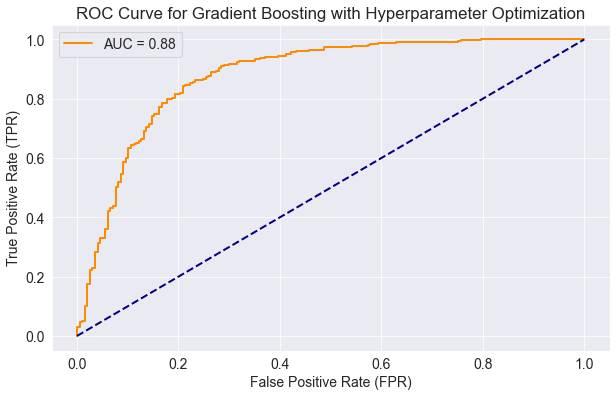

Area under curve (AUC) test data:0.8776115415442158


In [22]:
# Make probabilistic predictions (scores)
y_proba_test = gb.predict_proba(test_inputs)[:,1]

# getting false positive rate and true positive rate
fprs_test, tprs_test, thresholds_test = roc_curve(test_targets, y_proba_test)

# area under curve score
roc_auc_test = roc_auc_score(test_targets, y_proba_test)

plt.figure()
plt.plot(fprs_test, tprs_test, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Gradient Boosting with Hyperparameter Optimization')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC) test data:{roc_auc_test}')

There is major improvement in the recall score for closed class which improved from 76% to 79%. Area under curve also improved from 91.33% to 91.54%. We can look at the final model comparisons below:

|      Model          |    Test Score   |    AUC    |     Class    |    Precision Score      |     Recall Score      |
|---------------------|-----------------|-----------|--------------|-------------------------|-----------------------|
| Logistic Regression |      0.826      |   0.887   |       0      |         0.81            |         0.76          |
|                     |                 |           |       1      |         0.84            |         0.87          |
| Decision Tree       |      0.765      |   0.838   |       0      |         0.72            |         0.70          |
|                     |                 |           |       1      |         0.79            |         0.81          |
| Random Forest       |      0.813      |   0.871   |       0      |         0.85            |         0.67          |
|                     |                 |           |       1      |         0.80            |         0.91          |
| Gradient Boosting   |      0.839      |   0.913   |       0      |         0.84            |         0.76          |
|                     |                 |           |       1      |         0.84            |         0.90          |
| GB - Hyperparameter Optimization|0.853|   0.915   |       0      |         0.84            |         0.79          |
|                     |                 |           |       1      |         0.86            |         0.89          |

Let's save this model to disk so we can instantiate it in the future without retraining the model from scratch.

In [23]:
best_model = {
    'model': gb
}

In [24]:
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

We will now look into the essential features for predicting a restaurant's sustainability:

In [25]:
# extract feature importances from the fitted gradient boosting model
importances = gb.feature_importances_
features_df = pd.DataFrame(columns=['feature', 'importance'])
i = 0
for col in train_inputs.columns:
    features_df.loc[i, 'feature'] = col
    features_df.loc[i, 'importance'] = importances[i]
    i += 1

features_df = features_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

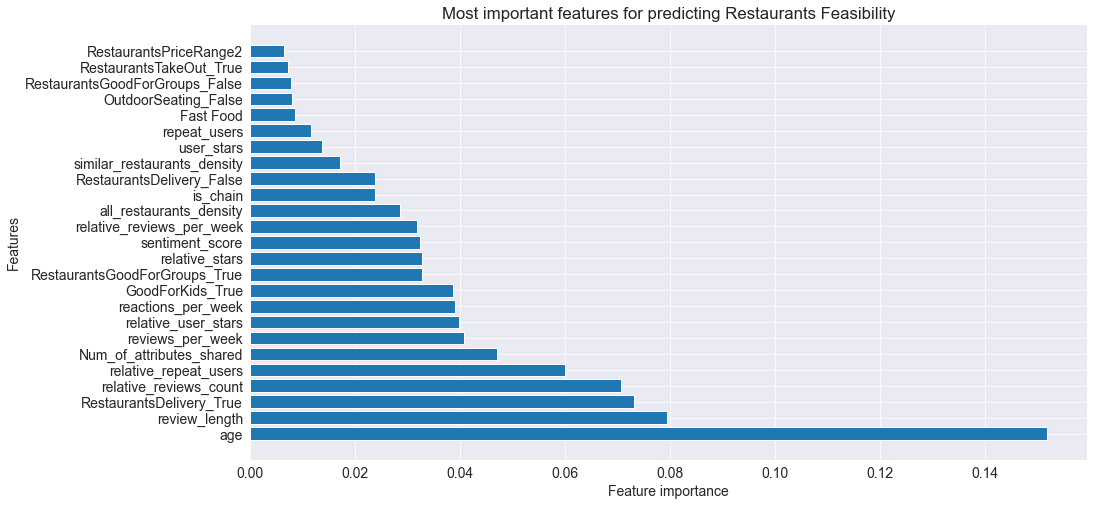

In [26]:
# check most important features  
plt.figure(figsize=(15,8))
plt.barh(features_df['feature'].head(25), features_df['importance'].head(25))
plt.title('Most important features for predicting Restaurants Feasibility')
plt.xlabel('Feature importance')
plt.ylabel('Features')
sns.despine()
plt.show()

**Conclusion:**
Based on our analysis of the given dataset, key features for predicting a restaurant's feasibility are:
1. **Age:** As expected, age of a restaurant plays a major role in predicting a restaurant's life. Probability of a restaurant getting closed is low if it's been in business a long period of time as compared to new restaurants who are yet to establish their name and place in the market. The older the restaurant, the larger it's customer base would be. More customers in turn generate larger revenues for the business and help the business live longer. 
2. **Relative Reviews Count:** Review count is directly proportional to the footfall. This field provides information about how a restaurant is performing as compared to the mean value for restaurants in it's vicinity.
3. **Review Length:** Number of words used in the reviews can help predicting the restaurant's feasibility as a customer may write about their exceptional experience or dissatisfaction in a well-written, strongly worded review. Emotions, positive or negative, are generally explained with reasons and hence, this could strongly help in predicting the life/performance of a restaurant.
4. **Number of Attributes Shared:** Most successful restaurants share information about their business' attributes which help customers in making informed decision about whether to visit that outlet or not based on what they are looking for. Uninformed customer is more likely to get disappointed later if the customer does not get any particular service/feature they were looking. For example, if a restaurant has specifically provided information about lack of parking facilities at the area, it will significantly help the customer to be prepared for it and use alternate way of transportation or park their vehicle somewhere else.
5. **Relative User Stars:** Stars received by a restaurant relative to places in it's neighborhood is a strong metric. When in the area, a person definitely looks atit's stars rating while deciding on a place to eat. Restaurants with higher ratings are generally preferred and this field can immensely help in measuring a restaurant's performance.

6. **Restaurant Delivery:** Whether a restaurant is providing delivery services or not is essential in today's times. Not everyone is able to dine-in during the weekdays. With the ongoing pandemic, people generally prefer to place an order for home delivery to avoid contact with other people. This also helps reduce the wait and travel time for them. Hence, this attribute is extremely important in predicting a restaurant's life. 